<a href="https://colab.research.google.com/github/soniyakumari09/soniyakumari09/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NETFLIX

**Problem Statement:**
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. Business Problem Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

The exploration have a goal..

1.How has the number of movies released per year changed over the last 20-30
years?

2.Comparison of tv shows vs. movies.

3.What is the best time to launch a TV show?

4.Analysis of actors/directors of different types of shows/movies.

5.Does Netflix has more focus on TV Shows than movies in recent years

6.Understanding what content is available in different countries




lets import the basic libraries to visualize and analyse the netfilx data and to load and read the netflix data we uses read_csv.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/netflix.csv')

In [ ]:
data.head() ## First five records

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.tail() ## last five records

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**Observations on the shape of data**

In [ ]:
data.shape

(8807, 12)

The dataset contains over 8807 rows, 12 columns. Ater a quick view of the data frames, it looks
like a typical movie/TVshows data frame. We can also see that there are NaN values in some columns.


**data types of all the attributes**

In [ ]:
data.info() ## data types of all attributes ##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


After the above information it is clear that data type of date_added column is nothing but string so inorder to change its datatypewe can use pd.to_datetime() to change its datatype from string to datetime dtype so that all operation associated with date time could be applied

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'],format= 'mixed')
data['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

## statistical summarry before data cleaning ##

In [ ]:
data.describe()

,date_added,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [ ]:
data.columns ## titles of columns ## it can be also find out by

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Missing value Detection -**


Data Cleaning means the process of identifying incorrect, incomplete, inaccurate, irrelevant, or missing pieces of data and then modifying, replacing, or deleting them as needed. Data Cleansing is
considered as the basic element of Data Science.


the sum of missing values is identified column wise

In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

There are a total of 4307 null values across the entire dataset with 2634 missing points under
"director", 825 under "cast", 831 under "country", 11 under "date_added", 4 under "rating" and
3 under “duration ”. We will have to handle all null data points before we can dive into EDA and
modelling.

**3. Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
barchart = data['type'].value_counts()
barchart

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

"Type" cloumn is a categorical attribute which contains 2 catagories - TV show and movies where no. of movies produced is much more than TV shows

In [ ]:
data['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

"country" is a categorical attribute. it contains countries name which has produced movives/TV show
top 5 countries are  - "United States", "India"  
"United Kingdom "
"Japan "           
"South Korea "    


In [ ]:
data['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
data['release_year'].value_counts()


release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [ ]:
data['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

With the help of function value_counts() we have information about each column like heighest no. of movies/tv shows realeased in which year, top director.

**How has the number of movies released per year changed over the last 20-30 years?**

In [ ]:
data_movies = data.loc[data['type'] =='Movie']
data_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


As this data is not sorted in order to sort acoording to release year we can use .sort_values()

In [ ]:
data_movie_sort = data_movies.sort_values('release_year',ascending=False)
data_movie_sorted=data_movie_sort.groupby(['release_year'])['release_year'].count()

In [ ]:
new=data_movie_sorted.to_frame()
new

,release_year
release_year,
1942,2
1943,3
1944,3
1945,3
1946,1
...,...
2017,767
2018,767
2019,633


In [ ]:
new.columns =['no_of_movies']
new2 =new.reset_index()
new3=new2.tail(30)
new3

,release_year,no_of_movies
43,1992,20
44,1993,24
45,1994,20
46,1995,23
47,1996,21
48,1997,34
49,1998,32
50,1999,32
51,2000,33
52,2001,40


now we have the data of movies released in last 30 years and will do the visual analysis of it.

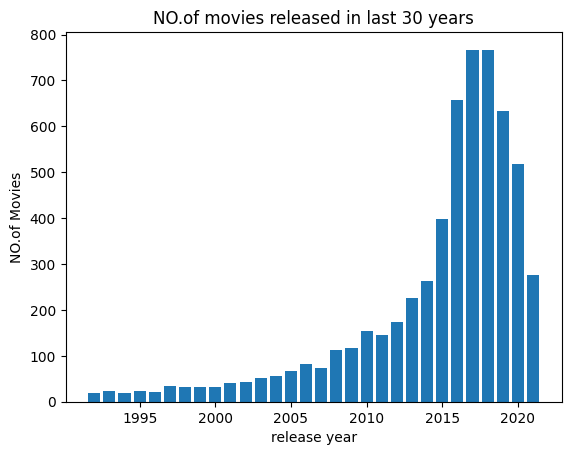

In [ ]:
plt.bar(new3['release_year'], new3['no_of_movies'])
plt.title('NO.of movies released in last 30 years')
plt.xlabel('release year')
plt.ylabel('NO.of Movies')
plt.show()

**Analysis **: from the above graph it is clear that the platform have rich content of recently released movies as the graph goes up from 2005 to 2020 which shows that platform have most of thier Movies which are released in these years

**Recommendation **: the platform can add more of content form movies earlier than 2005 as it would help them increase their customer base as because there could be possiblity of people who like old movies which were released way back

**Handling comma seperated values**

In [ ]:
data['director'].str.contains(',').sum()

614

In [ ]:
data['cast'].str.contains(",").sum()

7101

In [ ]:
data['country'].str.contains(",").sum()

1320

In [ ]:
data['listed_in'].str.contains(",").sum()

6787

It is clear from above observation that directo,cast,country,listed_in in the provided data are having elemeent with comma seperated or nested data

Inorder to deal with Nested columns we can use concept of unwrapping whose elements are seperated by "," using .str.split() for splitting the string into list and assigning back to their respective columns by process below

In [ ]:
data['director'] = data['director'].str.split(",")
data['cast'] =data['cast'].str.split(",")
data['country'] = data['country'].str.split(",")
data['listed_in'] = data['listed_in'].str.split(",")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],2021-09-25,2020.0,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021.0,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021.0,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021.0,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [ ]:
data_exp = data.explode('country', ignore_index=True)
data_exp =data_exp.explode('director', ignore_index=True)
data_exp =data_exp.explode('listed_in', ignore_index=True)
data_exp= data_exp.explode('cast', ignore_index=True)
data_exp

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...


As we can see the original data is converted into 202065 rows and earlier it was 8807 as we have wnwraped the nested data.

**handling missing values**
Imputation is a treatment method for missing values by filling it  using certain techniques- Can use mean, mode, or use predictive modelling. In thiscase study, we will discuss the use of the
fillna function from Pandas for this imputation. Drop rows containing missing values.

In [ ]:
data_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      151422 non-null  object        
 4   cast          199916 non-null  object        
 5   country       190168 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


In [ ]:
data_exp.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

Now firstly we will drop the rows where most of the details are null where we can't use predictive technique to generate information for other columns as which we are going to do further so those rows are of no need for that we need to identify them.

In [ ]:
to= data_exp[data_exp[['director', 'cast','country']].isnull().all(axis = 1)].index
to

Index([    85,     86,    353,    354,    355,    495,    496,    497,   1751,
         2713,
       ...
       177779, 185009, 185010, 187480, 187481, 197394, 197395, 202006, 202007,
       202008],
      dtype='int64', length=184)

In [ ]:
data_exp.drop(to, inplace =True)
data_exp

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [ ]:
data_exp.isnull().sum()

show_id             0
type                0
title               0
director        38577
cast             1094
country         10040
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
dtype: int64

Filling Categorical missing values using prediction through other column values

Director: missing data_exploded directors name {nan} could be repalced with the director names using {type,listed_in'} for most accurate prediction

**applying proces**: using group by apply , lambda fucntion and x.mode(), .fillna() we can replace the missing value as shown below : 1. grouping will assure that same type and listed_in wold have same director_name too thats why i took these 2 parameter further lambda fucntion will fill all the null/nan values in the column of director of group made with the mode of all the maximum occuring director name in the same group and this will happen for all the group for all missing director further if there is any group where all director name are empty it will be replaced with 'no_director'

In [ ]:
data_exp['director']=data_exp.groupby(['type','listed_in'])['director'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'No_director'))

In [ ]:
data_exp['cast']=data_exp.groupby(['type','listed_in','director'])['cast'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'No_cast'))

In [ ]:
data_exp['country']=data_exp.groupby(['type','listed_in','director','cast'])['country'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'No_data'))


All Missing value in director,cast,country have been filled now

**Comparison of tv shows vs. movies**

Visual Analysis** - Univariate, Bivariate after pre-processing of the data
**Univariate analysis**
Analysis done based only on one variable. variable could be categorical
 or numerical/contineous, for now, let's see what these are in graphs.

To analyse the variable **'type'** we can use  both pie chart and countplot/barchart as this is a categorical variable.
we are performing univariate analysis of categorical variable

<Axes: xlabel='type', ylabel='count'>

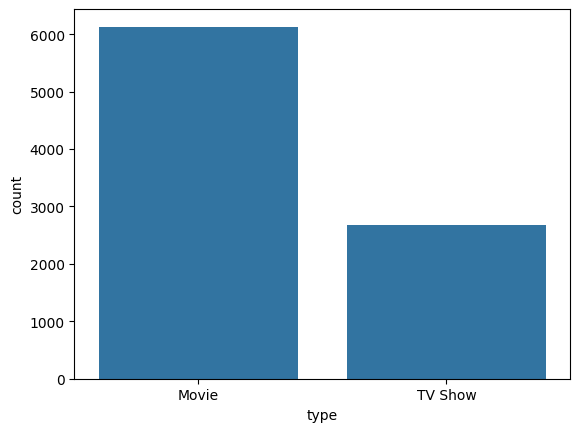

In [ ]:
sns.countplot(data =data, x='type')

With this count plot we can easily identify the no. of movies produced is higer than TV shows.
What if instead of actual frequencues, we want see the proportion of the categories?
Lets explore through pie chart..

In [ ]:
piii = data['type'].value_counts()
x=piii.index
y=piii.values
x,y

(Index(['Movie', 'TV Show'], dtype='object', name='type'), array([6131, 2676]))

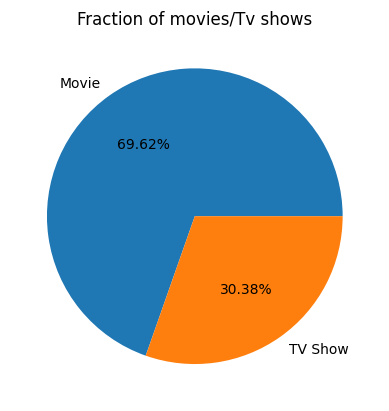

In [ ]:
plt.pie(y, labels = x, autopct = '%.2f%%')

plt.title('Fraction of movies/Tv shows')
plt.show()

**What is the best time to launch a TV show?**
we will use the original uncleaned data as all the type that is Tv show and Movies are all availble and have no missing value similarly dates also have no missing values

In [ ]:
TV_Show= data.loc[data['type'] == 'TV Show']
TV_Show.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,[Mike Flanagan],"[Kate Siegel, Zach Gilford, Hamish Linklater...",NaN,2021-09-24,2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",The arrival of a charismatic young priest brin...


In [ ]:
TV_Show.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2676 non-null   object        
 1   type          2676 non-null   object        
 2   title         2676 non-null   object        
 3   director      230 non-null    object        
 4   cast          2326 non-null   object        
 5   country       2285 non-null   object        
 6   date_added    2666 non-null   datetime64[ns]
 7   release_year  2676 non-null   int64         
 8   rating        2674 non-null   object        
 9   duration      2676 non-null   object        
 10  listed_in     2676 non-null   object        
 11  description   2676 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 271.8+ KB


In [ ]:
TV_Show['month'] =TV_Show['date_added'].dt.month_name()
TV_Show.head()

<ipython-input-51-0852779b60d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_Show['month'] =TV_Show['date_added'].dt.month_name()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,September
5,s6,TV Show,Midnight Mass,[Mike Flanagan],"[Kate Siegel, Zach Gilford, Hamish Linklater...",NaN,2021-09-24,2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",The arrival of a charismatic young priest brin...,September


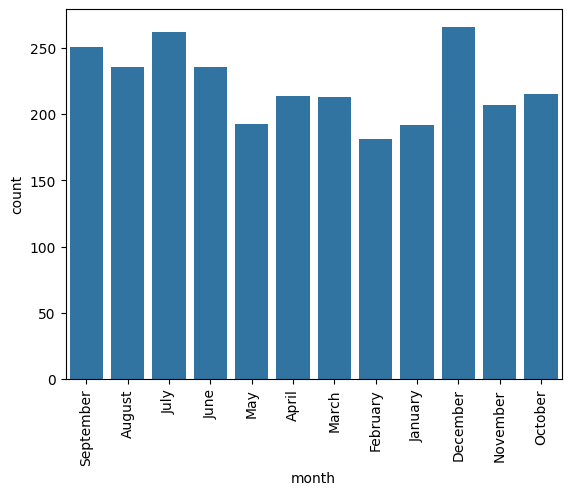

In [ ]:
sns.countplot(data = TV_Show, x='month')
plt.xticks(rotation = 90)
plt.show()

Insights: From the above graph it is clear that december has the highest number of tv_shows released on platform and it can be said that this month is the best time to release Tv shows as it have a trend from the data available

Recommendations: all the other months february,january and may should be need to be looked upon as these month have lowest number of tv shows released in ordor to engage more users this month need to release more tv shows.

# Analysis of actors/directors of different types of shows/movies.

Since this question contains lots of analysis so i have broken down the question into two parts below i have done halaf of the analysis only for Movies and remaining Half i have i attempted in the last part of this notebook while doing other analysis in between


firstly filtering the cleaned data on the basis of tvshows/movies to perform better analysis.

In [ ]:
movies = data_exp[data_exp['type']== 'Movie']


In [ ]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,No_data,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
160,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,No_data,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,No_data,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
162,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,No_data,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145885 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       145885 non-null  object        
 1   type          145885 non-null  object        
 2   title         145885 non-null  object        
 3   director      145885 non-null  object        
 4   cast          145885 non-null  object        
 5   country       145885 non-null  object        
 6   date_added    145885 non-null  datetime64[ns]
 7   release_year  145885 non-null  int64         
 8   rating        145876 non-null  object        
 9   duration      145882 non-null  object        
 10  listed_in     145885 non-null  object        
 11  description   145885 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 14.5+ MB


In [ ]:
movies.dropna(how='any', axis= 0,inplace =True)


<ipython-input-66-27c4f77d6c0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(how='any', axis= 0,inplace =True)


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145873 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       145873 non-null  object        
 1   type          145873 non-null  object        
 2   title         145873 non-null  object        
 3   director      145873 non-null  object        
 4   cast          145873 non-null  object        
 5   country       145873 non-null  object        
 6   date_added    145873 non-null  datetime64[ns]
 7   release_year  145873 non-null  int64         
 8   rating        145873 non-null  object        
 9   duration      145873 non-null  object        
 10  listed_in     145873 non-null  object        
 11  description   145873 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 14.5+ MB


In [ ]:
Cast_rating= movies.groupby(['rating','cast'])['rating','cast'].value_counts().reset_index().drop(0,axis= 1)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
country_filtered = data.set_index('title').country.str.split(',', expand= True).stack().reset_index(level = 1, drop = True)

# **Inorder to check the Most available Genre movie we do as below to get insights**

In [ ]:
movies['year_added'] = movies['date_added'].dt.year


<ipython-input-29-7584e609ce5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['year_added'] = movies['date_added'].dt.year


In [ ]:
movie_genre = movies.groupby(['listed_in','director'])['listed_in'].aggregate('count').to_frame()

In [ ]:
movie_genre.head()

listed_in
listed_in       director                    
 Anime Features  Daisuke Nishio            8
                 Frank O'Connor            8
                 Hideki Futamura           8
                 Hiroshi Yamazaki          8
                 Hiroyuki Seshita         26

In [ ]:
movie_genre.columns =['count_of_movies']


In [ ]:
movie_genre.reset_index(inplace =True)


In [ ]:
movie_genre.drop('count_of_movies', inplace=True,axis=1)


In [ ]:
movie_genre['listed_in'] = movie_genre['listed_in'].str.split(" ")


In [ ]:
movie_genre['listed_in'] = movie_genre['listed_in'].str.join("")

In [ ]:
movie_genre['listed_in'].value_counts()


listed_in
InternationalMovies      2287
Dramas                   2185
Comedies                 1479
Documentaries             872
IndependentMovies         788
Action&Adventure          714
Children&FamilyMovies     570
Thrillers                 549
RomanticMovies            533
Music&Musicals            353
HorrorMovies              350
Sci-Fi&Fantasy            257
SportsMovies              226
Stand-UpComedy            199
LGBTQMovies               105
ClassicMovies              97
AnimeFeatures              81
CultMovies                 73
Faith&Spirituality         63
Movies                     35
Name: count, dtype: int64

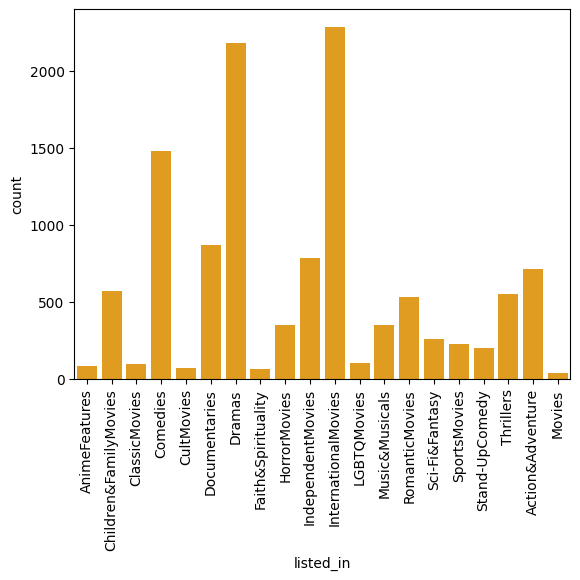

In [ ]:
sns.countplot(x='listed_in',data= movie_genre, color= 'orange' )
plt.xticks(rotation =90)
plt.show()

Top geners in movies are - international movies, dramas, comedies

# Does Netflix have more focus on TV Shows than movies in recent years

From the original data it is clear that type and release year have all available column for analysis so we dont  need any cleaning and get analysis from this data itself.

firstly we will check the no. of  movies/TV shows released in diffrent countries.

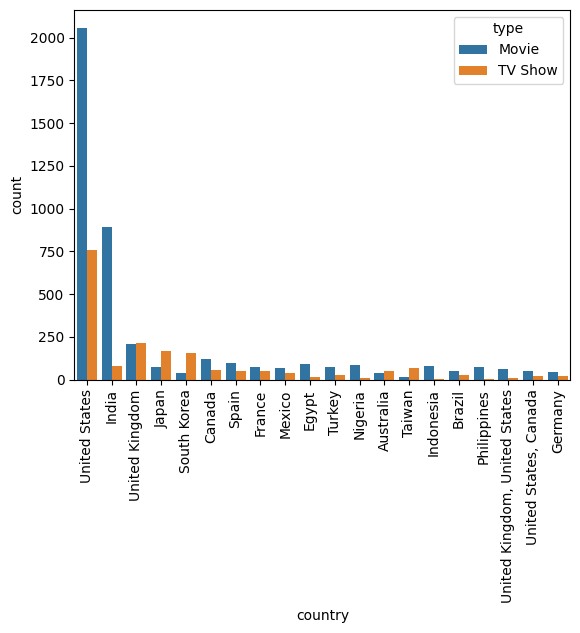

In [ ]:
sns.countplot(data = data, x='country', hue ='type', order = data['country'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()



with the above graph we can identify the no. of movies produced in comparison of TV shows is much heiger in us and india while in u.k japan and south korea is just opposite

For recent year we will check for years greater than 2010 from the given information date_added column.



In [ ]:
data['years'] = data['date_added'].dt.year

In [ ]:
Netflix_year = data.loc[data['years'] >= 2010 , ['type','years']]

In [ ]:
Netflix_year['years']=  Netflix_year['years'].astype(int)

In [ ]:
Netflix_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8793 non-null   object
 1   years   8793 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 206.1+ KB


<Axes: xlabel='years', ylabel='count'>

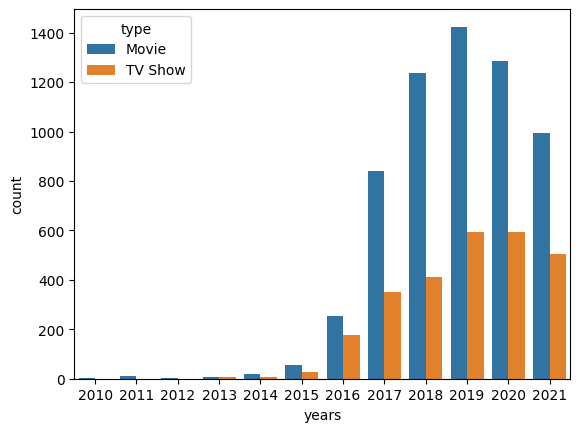

In [ ]:
sns.countplot(x='years',data= Netflix_year , hue='type')

**Insight**: from above data it is clear that Netflix have more focused on Movies than tv shows as in all year from 2010 till 2021 the Movies shows on platform were more as comparision to Tv shows

**Recommendation**: Ntflix need to more focus on Tv shows for increasing user base

# **Understanding what content is available in different countries**

To deal with this problem we will use already filtered and cleaned data.
which is data_exp



In [ ]:
data_exp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Alan Poul,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Alan Poul,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
country_genre =data_exp[['listed_in','country']].copy()
country_genre['listed_in'] = country_genre['listed_in'].str.split(" ")
country_genre['listed_in'] = country_genre['listed_in'].str.join("")

In [ ]:
country_genre['listed_in'].unique()

array(['Documentaries', 'InternationalTVShows', 'TVDramas', 'TVMysteries',
       'CrimeTVShows', 'TVAction&Adventure', 'RomanticTVShows',
       'TVComedies', 'TVHorror', 'Children&FamilyMovies', 'Dramas',
       'IndependentMovies', 'InternationalMovies', 'BritishTVShows',
       'RealityTV', 'Comedies', 'Spanish-LanguageTVShows', 'Thrillers',
       'Docuseries', 'RomanticMovies', 'Music&Musicals', 'HorrorMovies',
       'Sci-Fi&Fantasy', 'TVThrillers', "Kids'TV", 'Action&Adventure',
       'TVSci-Fi&Fantasy', 'ClassicMovies', 'AnimeFeatures',
       'SportsMovies', 'AnimeSeries', 'KoreanTVShows', 'Science&NatureTV',
       'TeenTVShows', 'CultMovies', 'TVShows', 'Faith&Spirituality',
       'LGBTQMovies', 'Stand-UpComedy', 'Movies',
       'Stand-UpComedy&TalkShows', 'Classic&CultTV'], dtype=object)

In [ ]:
country_genre['listed_in'].nunique()

42

In [ ]:
country_genre  = country_genre.groupby(['country','listed_in']).value_counts().reset_index(name='toal')
country_genre

,country,listed_in,toal
0,,ClassicMovies,9
1,,Documentaries,2
2,,Dramas,40
3,,IndependentMovies,9
4,,InternationalMovies,41
...,...,...,...
2045,West Germany,Documentaries,2
2046,West Germany,InternationalMovies,2
2047,Zimbabwe,Comedies,12
2048,Zimbabwe,InternationalMovies,12


In [ ]:
country_genre_counts = country_genre.groupby('listed_in')['country'].value_counts().rename('counts_of_genre_countrywise').reset_index()


In [ ]:
country_genre_counts

,listed_in,country,counts_of_genre_countrywise
0,Action&Adventure,Angola,1
1,Action&Adventure,Argentina,1
2,Action&Adventure,Singapore,1
3,Action&Adventure,Vietnam,1
4,Action&Adventure,United States,1
...,...,...,...
2045,Thrillers,Bulgaria,1
2046,Thrillers,Brazil,1
2047,Thrillers,Belgium,1
2048,Thrillers,Australia,1


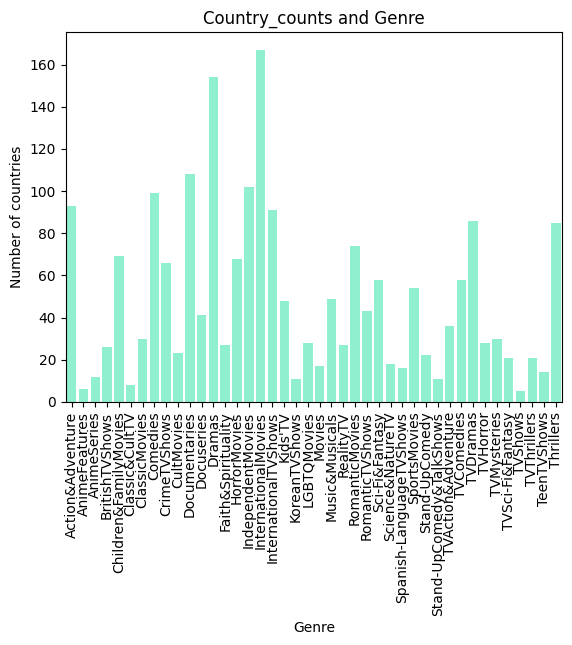

In [ ]:
sns.countplot(data=country_genre_counts, x='listed_in', color='aquamarine').set(title='Country_counts and Genre', xlabel='Genre', ylabel='Number of countries')
plt.xticks(rotation = 90)
plt.show()

Insight the above insight shows that international movies, drama having most of the countries of origin

To get country wise data which having the most genre produced by them are fetched as follows

The below process is done to fetch the the most popular genre in all country for better understanding

In [ ]:
country_genre_max_counts = country_genre_counts.groupby('country').apply(lambda x: x.loc[x['counts_of_genre_countrywise'].idxmax()]).reset_index(drop=True)


In [ ]:
country_genre_max_counts.drop("counts_of_genre_countrywise",axis= 1,inplace=True)

In [ ]:
country_genre_max_counts.loc[country_genre_max_counts['listed_in'] == 'Comedies']

,listed_in,country
24,Comedies,Croatia
50,Comedies,Jordan
60,Comedies,Malaysia
68,Comedies,Netherlands
73,Comedies,Pakistan
76,Comedies,Peru
79,Comedies,Portugal
81,Comedies,Romania
98,Comedies,Syria
107,Comedies,Uruguay


In [ ]:
country_genre_max_counts.loc[country_genre_max_counts['listed_in'] == 'Action&Adventure']

,listed_in,country
4,Action&Adventure,Angola
5,Action&Adventure,Argentina
7,Action&Adventure,Australia
10,Action&Adventure,Bahamas
12,Action&Adventure,Belgium
...,...,...
188,Action&Adventure,Turkey
190,Action&Adventure,United Arab Emirates
191,Action&Adventure,United Kingdom
192,Action&Adventure,United States


In [ ]:
country_genre_max_counts.loc[country_genre_max_counts['listed_in'] == 'Children&FamilyMovies']

,listed_in,country
20,Children&FamilyMovies,Cayman Islands
29,Children&FamilyMovies,East Germany
51,Children&FamilyMovies,Kazakhstan
55,Children&FamilyMovies,Lebanon
59,Children&FamilyMovies,Malawi
77,Children&FamilyMovies,Philippines
80,Children&FamilyMovies,Qatar
110,Children&FamilyMovies,West Germany
117,Children&FamilyMovies,Belgium
123,Children&FamilyMovies,Chile


In [ ]:
country_genre_max_counts.loc[country_genre_max_counts['listed_in'] == 'Documentaries'].head(15)

,listed_in,country
0,Documentaries,
26,Documentaries,Guatemala
33,Documentaries,Iraq
35,Documentaries,Israel
54,Documentaries,Palestine
55,Documentaries,Peru
59,Documentaries,Qatar
73,Documentaries,Taiwan
79,Documentaries,Uruguay
103,Documentaries,Georgia


**Actor/Director - Analysis basis on Genre,duration,country,year they were added**

Creating a new table applying cleaning and changing data type



In [ ]:
Actor_director =data_exp.copy()

In [ ]:
Actor_director['listed_in'] = Actor_director['listed_in'].str.split(" ")
Actor_director['listed_in'] = Actor_director['listed_in'].str.join("")
Actor_director['date_added'] = pd.to_datetime(Actor_director['date_added'])
Actor_director['years'] = Actor_director['date_added'].dt.year
Actor_director['years'].fillna(0,inplace =True)
Actor_director['years']=  Actor_director['years'].astype(int)

Checking Alignment of listed_in column values



In [ ]:
Actor_director['listed_in'].value_counts()

listed_in
Dramas                      29802
InternationalMovies         28237
Comedies                    20827
InternationalTVShows        12819
Action&Adventure            12216
IndependentMovies            9834
Children&FamilyMovies        9764
TVDramas                     8941
Thrillers                    7107
RomanticMovies               6410
TVComedies                   4953
CrimeTVShows                 4723
HorrorMovies                 4571
Kids'TV                      4553
Sci-Fi&Fantasy               4037
Music&Musicals               3075
RomanticTVShows              3040
Documentaries                2403
AnimeSeries                  2312
TVAction&Adventure           2287
Spanish-LanguageTVShows      2122
BritishTVShows               1800
SportsMovies                 1529
ClassicMovies                1443
TVMysteries                  1280
KoreanTVShows                1121
CultMovies                   1077
TVSci-Fi&Fantasy             1045
AnimeFeatures                1044
TVHo

Seperating Movies and TV show table for Analysis seperately.
firsty we will do for tv shows


In [ ]:
tvshow = Actor_director.loc[Actor_director['type']=='TV Show']

In [ ]:
tvshow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55996 entries, 1 to 201939
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       55996 non-null  object        
 1   type          55996 non-null  object        
 2   title         55996 non-null  object        
 3   director      55996 non-null  object        
 4   cast          55996 non-null  object        
 5   country       55996 non-null  object        
 6   date_added    55838 non-null  datetime64[ns]
 7   release_year  55996 non-null  int64         
 8   rating        55938 non-null  object        
 9   duration      55996 non-null  object        
 10  listed_in     55996 non-null  object        
 11  description   55996 non-null  object        
 12  years         55996 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 6.0+ MB


In [ ]:
tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,years
1,s2,TV Show,Blood & Water,Alan Poul,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,InternationalTVShows,"After crossing paths at a party, a Cape Town t...",2021
2,s2,TV Show,Blood & Water,Alan Poul,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,InternationalTVShows,"After crossing paths at a party, a Cape Town t...",2021
3,s2,TV Show,Blood & Water,Alan Poul,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,InternationalTVShows,"After crossing paths at a party, a Cape Town t...",2021
4,s2,TV Show,Blood & Water,Alan Poul,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,InternationalTVShows,"After crossing paths at a party, a Cape Town t...",2021
5,s2,TV Show,Blood & Water,Alan Poul,Dillon Windvogel,South Africa,2021-09-24,2021,TV-MA,2 Seasons,InternationalTVShows,"After crossing paths at a party, a Cape Town t...",2021


In [ ]:
tvshow['duration']  =  tvshow['duration'].str.split(" ")

<ipython-input-120-b4d2b6502f08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow['duration']  =  tvshow['duration'].str.split(" ")


In [ ]:
tvshow["Seasons"] =  tvshow["duration"].str[0]

<ipython-input-123-d8fef065862f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow["Seasons"] =  tvshow["duration"].str[0]


In [ ]:
tvshow['Seasons'].unique()

array(['2', '1', '9', '4', '5', '3', '6', '7', '10', '8', '17', '13',
       '15', '12', '11'], dtype=object)

In [ ]:
tv_show = tvshow[['Seasons','show_id']].groupby(['show_id','Seasons'])['show_id'].aggregate('count').rename({'show_id':'counts'},inplace=True)

In [ ]:
tv_show

lets identify the relationship between directors and countries by finding out the top director and top countries.

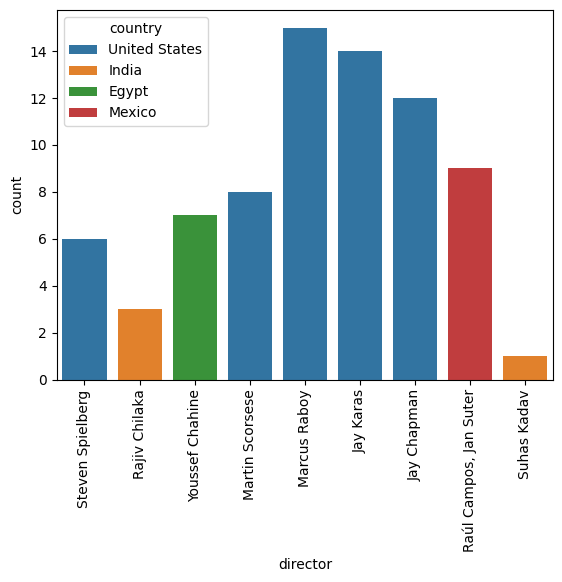

In [ ]:
top_dir = data['director'].value_counts().index[:10]
top_cou = data['country'].value_counts().index[:10]
top_data = data.loc[(data['director'].isin(top_dir)) & (data['country'].isin(top_cou))]
sns.countplot(data = top_data , x= 'director' , hue ='country')
plt.xticks(rotation= 90)
plt.show()

Among the top 10 directors most of them are from usa.

**Countries with most number of movies**

In [ ]:
Movies_new =Actor_director.loc[Actor_director['type'] == 'Movie']

In [ ]:
Movies_new1 = Movies_new[['show_id','country']].groupby(['show_id','country']).value_counts().reset_index()
Movies_new1

,show_id,country,count
0,s1,United States,1
1,s10,United States,22
2,s1000,United States,12
3,s1000,Germany,12
4,s1001,No_data,14
...,...,...,...
7838,s993,No_data,4
7839,s995,Nigeria,30
7840,s996,Turkey,60
7841,s997,Japan,15


we have to align countries as they are similar but not aligned so we are facing repetative values



In [ ]:
Movies_new1['country']=Movies_new1['country'].str.split(' ')

0         [United, States]
1         [United, States]
2       [, United, States]
3                [Germany]
4                [No_data]
               ...        
7838             [No_data]
7839             [Nigeria]
7840              [Turkey]
7841               [Japan]
7842               [India]
Name: country, Length: 7843, dtype: object

In [ ]:
Movies_new1['country']=Movies_new1['country'].str.join('')

In [ ]:
Movies_new2 = Movies_new1['country'].value_counts().reset_index()

In [ ]:
Movies_new2.columns =['country','Number_of_movies']

In [ ]:
movie = Movies_new2.head(10)

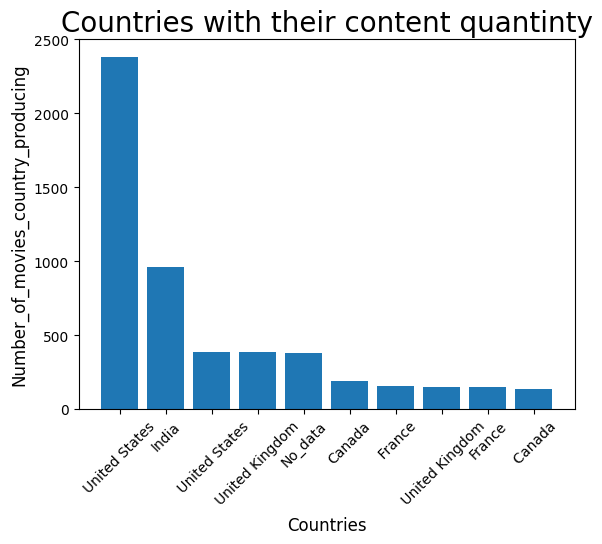

In [ ]:
x= movie['country']
y = movie['Number_of_movies']
plt.bar(x,y)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number_of_movies_country_producing',fontsize=12)
plt.title('Countries with their content quantinty',fontsize=20)
plt.xticks(rotation= 45)
plt.show()

Insight: it is clear that United States have the most available movies on netflix followed by india and united kingdom

Recommendation: countries like japan,china ,cpain, germany movies are less available on paltform so the netflix should decide on increasing there content from those countries which have less content on it ass more users across the globe fromm different countries could acess their native countries movies

outlier check-

An outlier is defined as an
observation that deviates abnormally from the standard data. In simple words, an outlier is used to define those data values which are far away from the general values in a dataset. An outlier can be broken down into out-of-line data.
For example, let us consider a row of data [10,15,22,330,30,45,60]. In this dataset, we can easily conclude that 330 is way off from the rest of the values in the dataset, thus 330 is an outlier. It was easy to figure out the outlier in such a small dataset, but when the dataset is huge, we need various methods to determine whether a certain value is an outlier or necessary information.

**Visual Detection**
Box plots are a simple way to visualize data through quantiles and detect outliers. IQR(Interquartile Range) is the basic mathematics behind boxplots. The top and bottom whiskers can be understood as the boundaries of data, and any data lying outside it will be an outlier.

Business Insights :

With the help of this article, we have been able to learn about-
1. Quantity: Our analysis revealed that Netflix had added more movies than TV shows,

aligning with the expectation that movies dominate their content library.
2. Content Addition: July emerged as the month when Netflix adds the most content,
closely followed by December, indicating a strategic approach to content release.
3. Genre Correlation: Strong positive associations were observed between various
genres, such as TV dramas and international TV shows, romantic and international
TV shows, and independent movies and dramas. These correlations provide insights
into viewer preferences and content interconnections.
4. Movie Lengths: The analysis of movie durations indicated a peak around the 1960s,
followed by a stabilization around 100 minutes, highlighting a trend in movie lengths
over time.
5. TV Show Episodes: Most TV shows on Netflix have one season, suggesting a
preference for shorter series among viewers.

6. Common Themes: Words like love, life, family, and adventure were frequently found
in titles and descriptions, capturing recurring themes in Netflix content.
7. Rating Distribution: The distribution of ratings over the years offers insights into the
evolving content landscape and audience reception.
8. Data-Driven Insights: Our data analysis journey showcased the power of data in
unravelling the mysteries of Netflix’s content landscape, providing valuable insights
for viewers and content creators.
9. Continued Relevance: As the streaming industry evolves, understanding these
patterns and trends becomes increasingly essential for navigating the dynamic
landscape of Netflix and its vast library.
10. Happy Streaming: We hope this blog has been an enlightening and entertaining
journey into the world of Netflix, and we encourage you to explore the captivating
stories within its ever-changing content offerings. Let the data guide your streaming
adventures!

RECOMMENDATIONS
 Netflix has to focus on TV Shows also because there are people who will like to see
tv shows rather than movies
 By approaching the top director we can plan some more movies/tv shows in order to
increase the popularity
 Not only reaching top director we can also see the director with less no of movies
and having high rating as there may be some financial
 issues or anything so inorder to get good content netflix can reach to them and netflix
can produce the movie and give the director a
 chance.
 We have seen most no of international movies genre so need to give priority to other
geners like hooro,comedy..etc
 In TV Shows we may focus on thriller genre which will be helpfull for having more no
of seasons
 Most of the movies released in ott is in a year 2019 so we need to go on increasing
this value in order to attract people by showing that
 getting subscription is usefull as netflix is releasing more movies per year
 Mainly the release in ott should focus on the festival holidays, year end and week
ends which is to be mainly focussed
 Some movies can be released directly into ott which has some positive talk which
may help in improving subscriptions
 Should focus on a actor who has immense following and make use of it by doing a
TV Shows or web series
 Advertisement in the country which has very less movies released should be
increased and attract people of that country by making their
 native TV Shows